Создать таблицу author следующей структуры:

In [ ]:
CREATE TABLE author(
    author_id INT PRIMARY KEY AUTO_INCREMENT, 
    name_author VARCHAR(50)
);

Заполнить таблицу author. В нее включить следующих авторов:
Булгаков М.А.
Достоевский Ф.М.
Есенин С.А.
Пастернак Б.Л.

In [ ]:
INSERT INTO author (name_author) 
VALUES ('Булгаков М.А.'), ('Достоевский Ф.М.'), ('Есенин С.А.'), ('Пастернак Б.Л.');

# Создание таблицы с внешними ключами
При создании зависимой таблицы (таблицы, которая содержит внешние ключи) необходимо учитывать, что :

каждый внешний ключ должен иметь такой же тип данных, как связанное поле главной таблицы (в наших примерах это INT);
необходимо указать главную для нее таблицу и столбец, по которому осуществляется связь:
FOREIGN KEY (связанное_поле_зависимой_таблицы)  
REFERENCES главная_таблица (связанное_поле_главной_таблицы)
По умолчанию любой столбец, кроме ключевого, может содержать значение NULL. При создании таблицы это можно переопределить,  используя  ограничение NOT NULL для этого столбца:

CREATE TABLE таблица (
    столбец_1 INT NOT NULL, 
    столбец_2 VARCHAR(10) 
);
 В созданной таблице в столбец_1 не может содержать пустое значение, а столбец_2 - может.

Для внешних ключей рекомендуется устанавливать ограничение NOT NULL (если это совместимо с другими опциями, которые будут рассмотрены в следующем шаге).

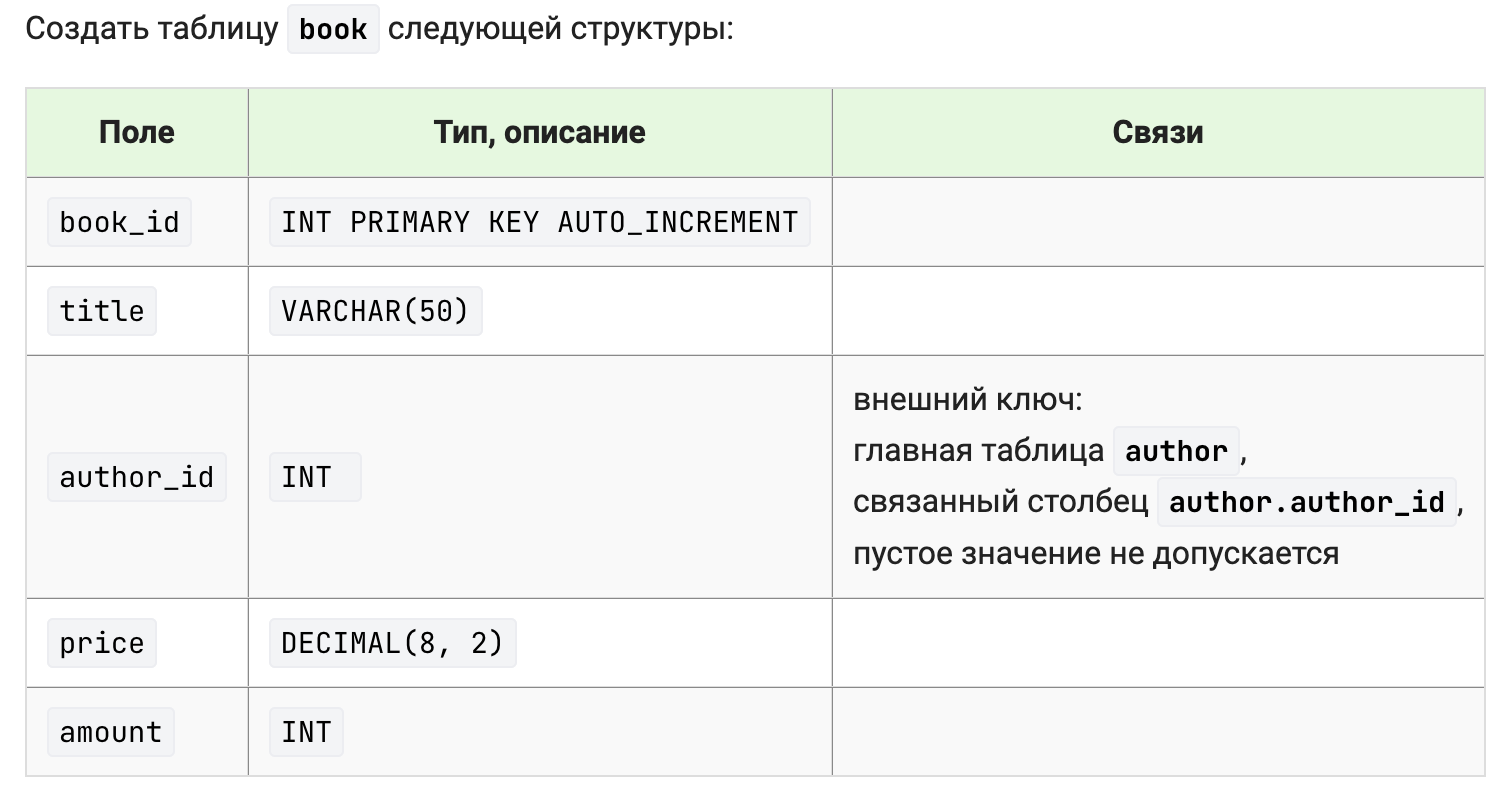

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) 
);

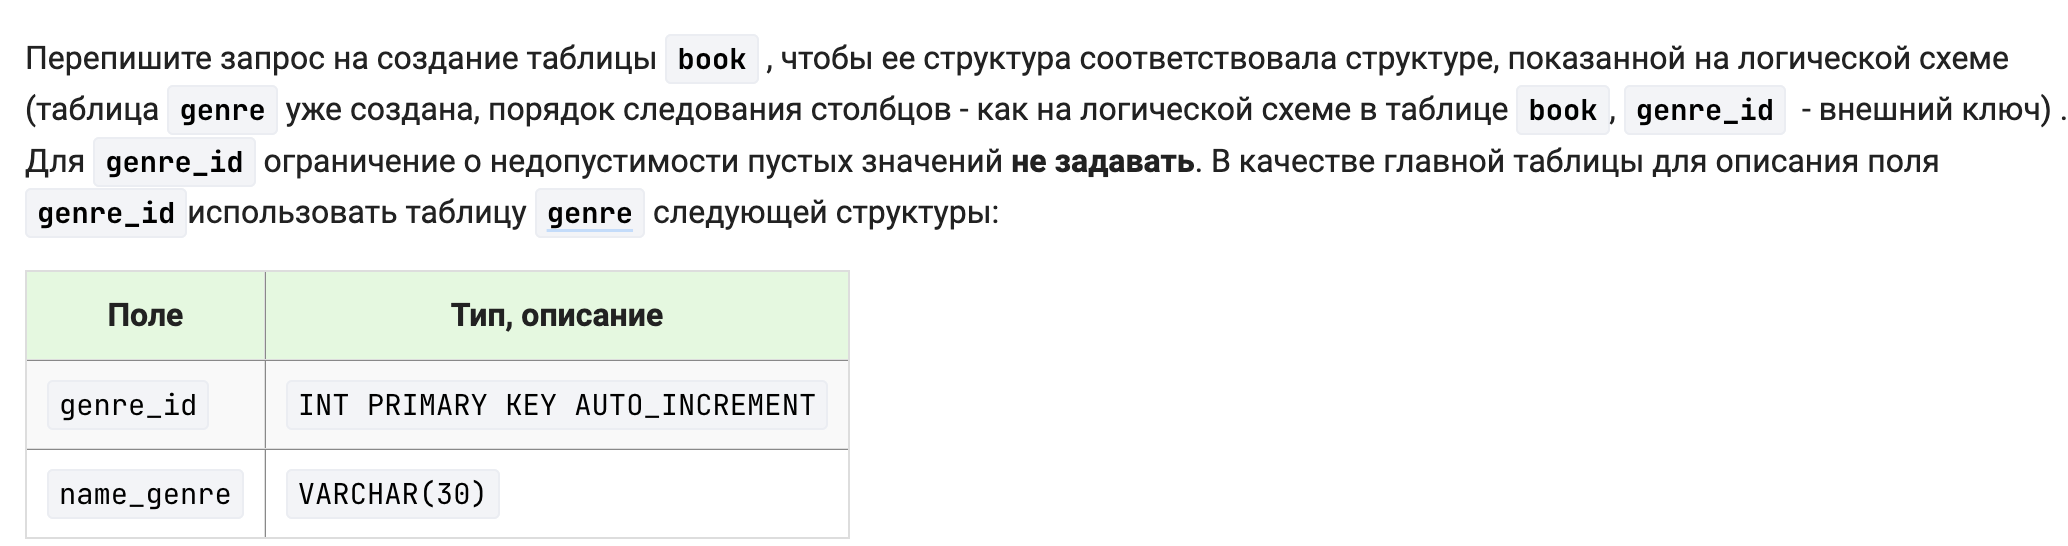

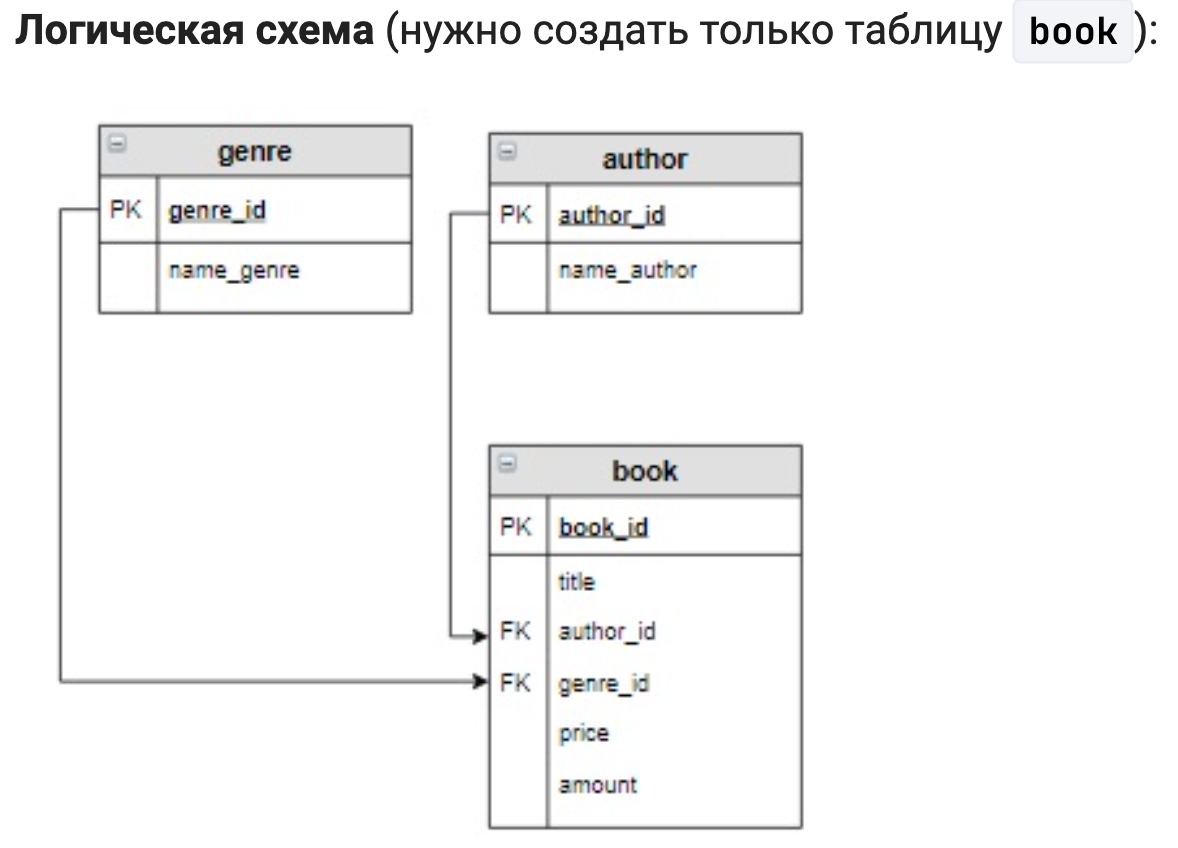

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL,
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id),
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id)
);

Действия при удалении записи главной таблицы
С помощью выражения ON DELETE можно установить действия, которые выполняются для записей подчиненной таблицы при удалении связанной строки из главной таблицы. При удалении можно установить следующие опции:

CASCADE: автоматически удаляет строки из зависимой таблицы при удалении  связанных строк в главной таблице.
SET NULL: при удалении  связанной строки из главной таблицы устанавливает для столбца внешнего ключа значение NULL. (В этом случае столбец внешнего ключа должен поддерживать установку NULL).
SET DEFAULT похоже на SET NULL за тем исключением, что значение  внешнего ключа устанавливается не в NULL, а в значение по умолчанию для данного столбца.
RESTRICT: отклоняет удаление строк в главной таблице при наличии связанных строк в зависимой таблице.

Важно! Если для столбца установлена опция SET NULL, то при его описании нельзя задать ограничение на пустое значение.

Пример

Будем считать, что при удалении автора из таблицы author, необходимо удалить все записи о книгах из таблицы book, написанные этим автором. Данное действие необходимо прописать при создании таблицы.

Запрос:

CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL, 
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) ON DELETE CASCADE
);


Задание
Создать таблицу book той же структуры, что и на предыдущем шаге. Будем считать, что при удалении автора из таблицы author, должны удаляться все записи о книгах из таблицы book, написанные этим автором. А при удалении жанра из таблицы genre для соответствующей записи book установить значение Null в столбце genre_id

In [ ]:
CREATE TABLE book (
    book_id INT PRIMARY KEY AUTO_INCREMENT, 
    title VARCHAR(50), 
    author_id INT NOT NULL,
    genre_id INT,
    price DECIMAL(8,2), 
    amount INT, 
    FOREIGN KEY (author_id)  REFERENCES author (author_id) ON DELETE CASCADE,
    FOREIGN KEY (genre_id)  REFERENCES genre (genre_id) ON DELETE SET NULL
);

Задание
Добавьте три последние записи (с ключевыми значениями 6, 7, 8) в таблицу book, первые 5 записей уже добавлены:

In [ ]:
INSERT INTO book (title, author_id, genre_id, price, amount) 
VALUES ('Стихотворения и поэмы',3,2,650.00,15),
('Черный человек',3,2,570.20,6),
('Лирика',4,2,518.99,2);

Соединение INNER JOIN
Оператор внутреннего соединения INNER JOIN соединяет две таблицы. Порядок таблиц для оператора неважен, поскольку оператор является симметричным.

SELECT
 ...
FROM
    таблица_1 INNER JOIN  таблица_2
    ON условие
...
Результат запроса формируется так:

каждая строка одной таблицы сопоставляется с каждой строкой второй таблицы;
для полученной «соединённой» строки проверяется условие соединения;
если условие истинно, в таблицу результата добавляется соответствующая «соединённая» строка;
Пример

Вывести название книг и их авторов.

Запрос:

SELECT title, name_author
FROM 
    author INNER JOIN book
    ON author.author_id = book.author_id;
Поскольку поля author_id в таблицах book и author называются одинаково, необходимо в запросах указывать полную ссылку на них (book.author_id и author.author_id).

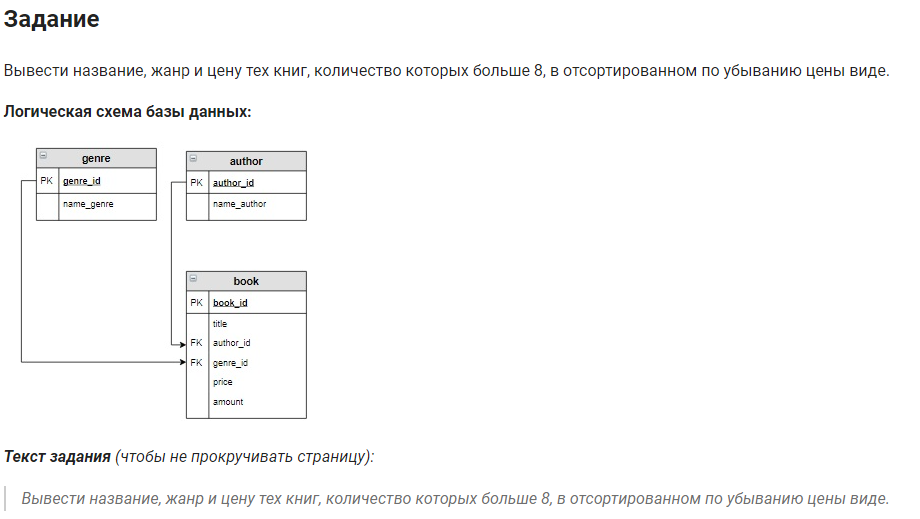

In [ ]:
SELECT title, name_genre, price
FROM 
    genre INNER JOIN book
    ON genre.genre_id = book.genre_id
WHERE amount > 8
ORDER BY price DESC;